<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.460970,55.286723,89.344465,97.985576,0.006707,293.084441,293.079345,0.005096
1,0.0,1.0,24.340284,95.808228,59.630747,88.767846,0.007690,278.554796,278.546922,0.007874
2,0.0,2.0,35.671937,47.028083,23.592498,37.249422,0.002577,153.544516,153.542357,0.002160
3,0.0,3.0,88.182540,84.983232,77.900413,64.588832,0.005054,325.660070,325.655470,0.004601
4,0.0,4.0,75.909132,39.555187,46.531556,46.392528,-0.006749,218.381654,218.389882,-0.008228
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.773790,96.998537,39.307344,71.261815,0.000242,264.341729,264.339762,0.001967
249996,999.0,246.0,26.273789,36.234457,44.584651,92.127100,-0.037186,209.182811,209.217184,-0.034373
249997,999.0,247.0,37.064269,50.445243,77.580232,99.963818,-0.001742,275.051819,275.052846,-0.001027
249998,999.0,248.0,58.245227,78.772435,65.040851,68.890261,-0.003239,280.945535,280.948705,-0.003170


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    40.460970  55.286723  89.344465  97.985576  0.006707  293.084441   
      1.0    24.340284  95.808228  59.630747  88.767846  0.007690  278.554796   
      2.0    35.671937  47.028083  23.592498  37.249422  0.002577  153.544516   
      3.0    88.182540  84.983232  77.900413  64.588832  0.005054  325.660070   
      4.0    75.909132  39.555187  46.531556  46.392528 -0.006749  218.381654   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  46.773790  96.998537  39.307344  71.261815  0.000242  264.341729   
      246.0  26.273789  36.234457  44.584651  92.127100 -0.037186  209.182811   
      247.0  37.064269  50.445243  77.580232  99.963818 -0.001742  275.051819   
      248.0  58.245227  78.772435  65.040851  68.890261 -0.003239  280.945535   
      249.0  73.464047  62.831404  95.924348  27.365473  0.003719  269.588991   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    293.079345  0.005096  
      1.0    278.546922  0.007874  
      2.0    153.542357  0.002160  
      3.0    325.655470  0.004601  
      4.0    218.389882 -0.008228  
...                 ...       ...  
999.0 245.0  264.339762  0.001967  
      246.0  209.217184 -0.034373  
      247.0  275.052846 -0.001027  
      248.0  280.948705 -0.003170  
      249.0  269.587944  0.001047  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    40.460970  55.286723  89.344465  97.985576  0.006707  293.084441   
      1.0    24.340284  95.808228  59.630747  88.767846  0.007690  278.554796   
      2.0    35.671937  47.028083  23.592498  37.249422  0.002577  153.544516   
      3.0    88.182540  84.983232  77.900413  64.588832  0.005054  325.660070   
      4.0    75.909132  39.555187  46.531556  46.392528 -0.006749  218.381654   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  46.773790  96.998537  39.307344  71.261815  0.000242  264.341729   
      246.0  26.273789  36.234457  44.584651  92.127100 -0.037186  209.182811   
      247.0  37.064269  50.445243  77.580232  99.963818 -0.001742  275.051819   
      248.0  58.245227  78.772435  65.040851  68.890261 -0.003239  280.945535   
      249.0  73.464047  62.831404  95.924348  27.365473  0.003719  269.588991   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    293.079345  0.005096  
      1.0    278.546922  0.007874  
      2.0    153.542357  0.002160  
      3.0    325.655470  0.004601  
      4.0    218.389882 -0.008228  
...                 ...       ...  
999.0 245.0  264.339762  0.001967  
      246.0  209.217184 -0.034373  
      247.0  275.052846 -0.001027  
      248.0  280.948705 -0.003170  
      249.0  269.587944  0.001047  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.460970,55.286723,89.344465,97.985576,0.006707,293.084441,293.079345,0.005096
1,0.0,1.0,24.340284,95.808228,59.630747,88.767846,0.007690,278.554796,278.546922,0.007874
2,0.0,2.0,35.671937,47.028083,23.592498,37.249422,0.002577,153.544516,153.542357,0.002160
3,0.0,3.0,88.182540,84.983232,77.900413,64.588832,0.005054,325.660070,325.655470,0.004601
4,0.0,4.0,75.909132,39.555187,46.531556,46.392528,-0.006749,218.381654,218.389882,-0.008228
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.773790,96.998537,39.307344,71.261815,0.000242,264.341729,264.339762,0.001967
249996,999.0,246.0,26.273789,36.234457,44.584651,92.127100,-0.037186,209.182811,209.217184,-0.034373
249997,999.0,247.0,37.064269,50.445243,77.580232,99.963818,-0.001742,275.051819,275.052846,-0.001027
249998,999.0,248.0,58.245227,78.772435,65.040851,68.890261,-0.003239,280.945535,280.948705,-0.003170


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    40.460970  55.286723  89.344465  97.985576  0.006707  293.084441   
      1.0    24.340284  95.808228  59.630747  88.767846  0.007690  278.554796   
      2.0    35.671937  47.028083  23.592498  37.249422  0.002577  153.544516   
      3.0    88.182540  84.983232  77.900413  64.588832  0.005054  325.660070   
      4.0    75.909132  39.555187  46.531556  46.392528 -0.006749  218.381654   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  46.773790  96.998537  39.307344  71.261815  0.000242  264.341729   
      246.0  26.273789  36.234457  44.584651  92.127100 -0.037186  209.182811   
      247.0  37.064269  50.445243  77.580232  99.963818 -0.001742  275.051819   
      248.0  58.245227  78.772435  65.040851  68.890261 -0.003239  280.945535   
      249.0  73.464047  62.831404  95.924348  27.365473  0.003719  269.588991   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    293.079345  0.005096  
      1.0    278.546922  0.007874  
      2.0    153.542357  0.002160  
      3.0    325.655470  0.004601  
      4.0    218.389882 -0.008228  
...                 ...       ...  
999.0 245.0  264.339762  0.001967  
      246.0  209.217184 -0.034373  
      247.0  275.052846 -0.001027  
      248.0  280.948705 -0.003170  
      249.0  269.587944  0.001047  

[250000 rows x 8 columns]

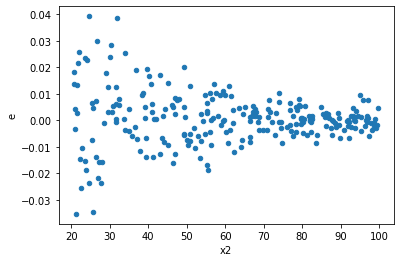

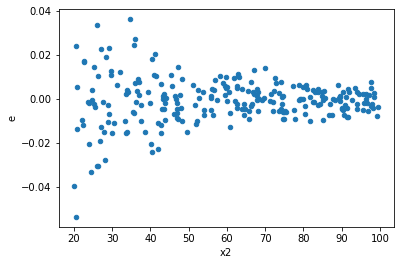

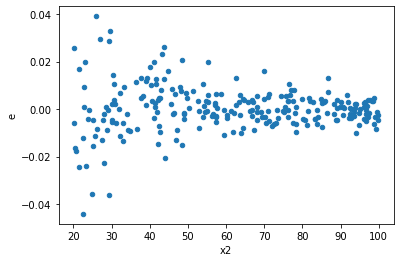

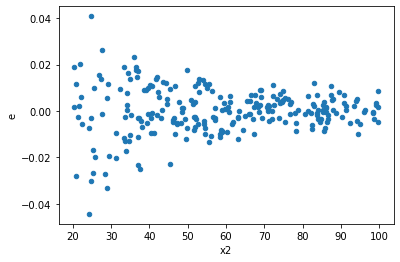

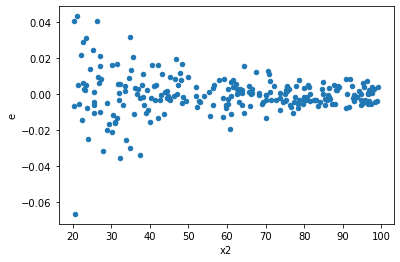

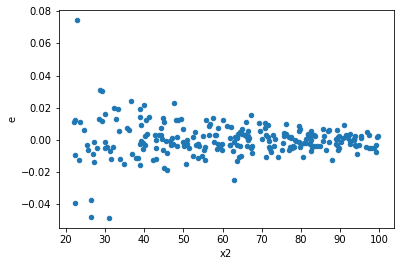

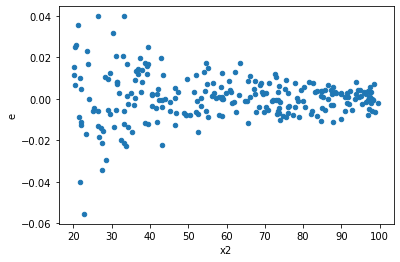

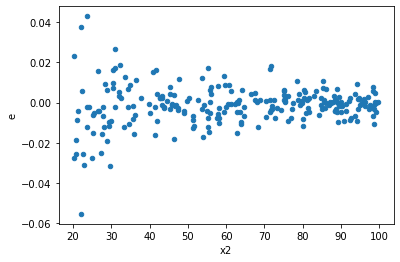

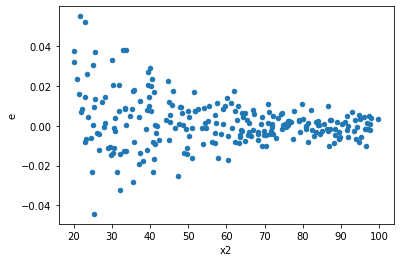

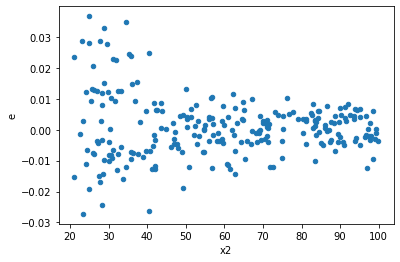

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,124.0,118.0,0.021818243267257224,0.00258490569038547,0.00017595357473594535,2.1905980426995508e-05,0.12449863812014023,1.3831229631387936e-26,Reject001=0 : Heteroscedasticity
1.0,123.0,119.0,0.01804749702691868,0.007854307688986416,0.00014672761810502992,6.600258562173459e-05,0.44983068950583593,1.436288232951243e-05,Reject001=0 : Heteroscedasticity
2.0,129.0,113.0,0.01647578890343624,0.007328048724785566,0.00012771929382508713,6.484998871491651e-05,0.5077540500946492,0.00020860751424521903,Reject001=0 : Heteroscedasticity
3.0,115.0,127.0,0.015101293491135658,0.009128038820914166,0.00013131559557509267,7.187432142452099e-05,0.547340330063231,0.0011120364955005868,Reject001=0 : Heteroscedasticity
4.0,116.0,126.0,0.026870717946314782,0.0039653398458548966,0.00023164412022685157,3.1470951157578543e-05,0.13585905451327107,6.4952405802610585e-24,Reject001=0 : Heteroscedasticity
5.0,115.0,127.0,0.008880347598896304,0.01999505904913089,7.722041390344613e-05,0.0001574414098356763,2.0388573678527013,0.00010003956119319923,Reject001=0 : Heteroscedasticity
6.0,123.0,119.0,0.004033000033591564,0.026284000902745103,3.2788618159281004e-05,0.00022087395716592523,6.7362996541348785,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,124.0,118.0,0.0067385810373412555,0.01717950212738674,5.434339546242948e-05,0.00014558900107954865,2.6790560258643055,1.2791938264200553e-07,Reject001=0 : Heteroscedasticity
8.0,128.0,114.0,0.003988860850812145,0.03085023769777149,3.116297539696988e-05,0.00027061612015589023,8.68389865565287,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      501
Reject001=0 : Heteroscedasticity    499
Name: Result_test, dtype: int64